# DATA ANALYSIS OF PROSPER LOANS
### By Clifford Ijelekhai

### Investigation Overview
In this investigation, I want to look at the overall growth trend in the total amount of loans issued over the years, what affects the borrower’s APR or interest rate and if there are differences between loans depending on how large the original loan amount is. The focus would be on the loan original amount, borrowers APR and investors for the loan.

### Dataset Overview
The dataset has a record of 113937 loan applications with 81features. Most of the features are numeric while some are categorical. For this analysis 15 of the features were selected and records with missing values were dropped.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load In The Data

In [2]:
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Select variables for analysis
There are 81variables in this dataset. 15 of them would be used for this data analysis

In [3]:
# The following variables would be selected for our analysis
loan_df = loan_df[['ListingNumber','Term','LoanStatus','BorrowerAPR',
                   'BorrowerRate','LenderYield','ProsperScore','Occupation','EmploymentStatus',
                   'IncomeRange','AmountDelinquent','LoanOriginalAmount',
                   'LoanOriginationDate','MonthlyLoanPayment','Investors']]
loan_df.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,Occupation,EmploymentStatus,IncomeRange,AmountDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors
0,193129,36,Completed,0.16516,0.1580,0.1380,NaN,Other,Self-employed,"$25,000-49,999",472.0,9425,9/12/2007 0:00,330.43,258
1,1209647,36,Current,0.12016,0.0920,0.0820,7.0,Professional,Employed,"$50,000-74,999",0.0,10000,3/3/2014 0:00,318.93,1
2,81716,36,Completed,0.28269,0.2750,0.2400,NaN,Other,Not available,Not displayed,NaN,3001,1/17/2007 0:00,123.32,41
3,658116,36,Current,0.12528,0.0974,0.0874,9.0,Skilled Labor,Employed,"$25,000-49,999",10056.0,10000,11/1/2012 0:00,321.45,158
4,909464,36,Current,0.24614,0.2085,0.1985,4.0,Executive,Employed,"$100,000+",0.0,15000,9/20/2013 0:00,563.97,20


### Priliminary Wrangling
#### Convert LoanOriginationDate in string format to datetime

In [4]:
loan_df['LoanOriginationDate'] = pd.to_datetime(loan_df['LoanOriginationDate'])

#### Dropping records with missing values

In [5]:
loan_df = loan_df.dropna()
loan_df.shape

(83520, 15)

### Distribution of key features

I will be looking at these four key features in our dataset **BorrowerAPR, BorrowerRate, LoanOriginalAmount, Investors** to have insight into how they are distributed using a histogram.

In [6]:
def plot_hist(data, xvar, bin_var):  
    bin_edges = np.arange(data[xvar].min(), data[xvar].max()+bin_var, bin_var)
    plt.hist(data=loan_df, x=xvar, bins=bin_edges)
    plt.xlabel(f'{xvar}')
    plt.ylabel('Numbers of Loan Applications')
    plt.title(f'Histogram of {xvar}')

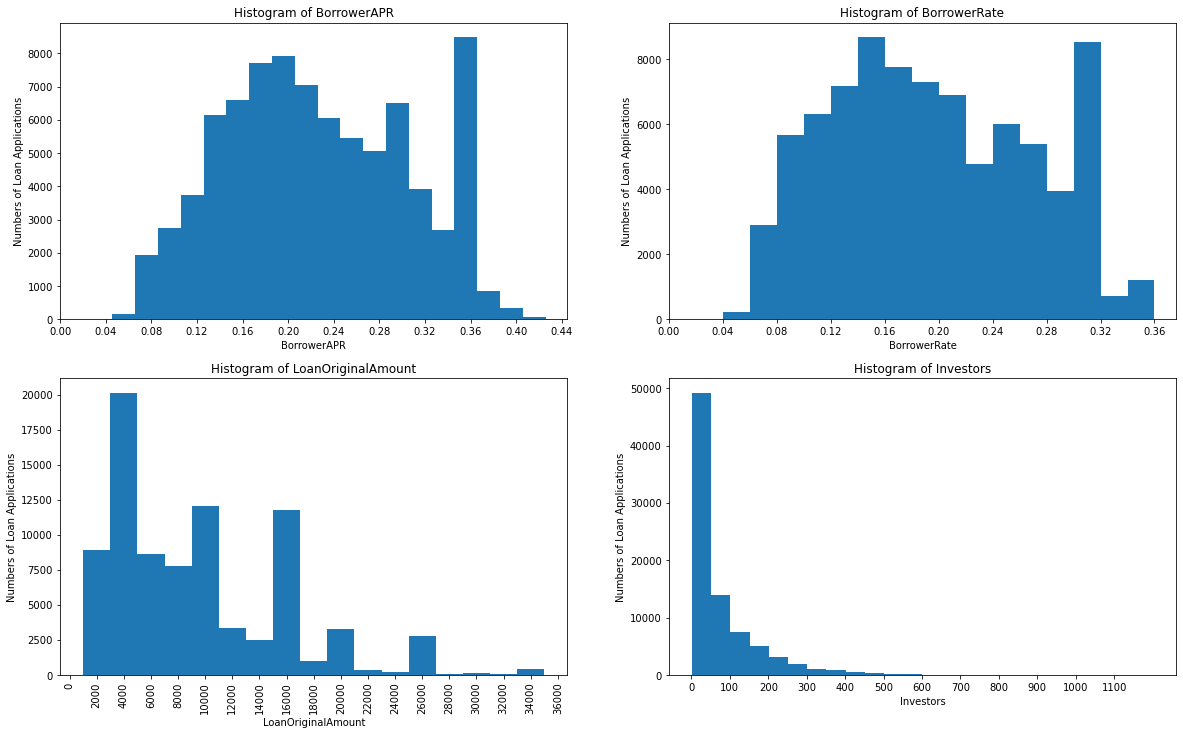

In [7]:
plt.figure(figsize=[20,12])
plt.subplot(2,2,1)
plot_hist(loan_df,'BorrowerAPR', 0.02)
plt.xticks(np.arange(0, loan_df.BorrowerAPR.max()+0.02, 0.04))

plt.subplot(2,2,2)
plot_hist(loan_df,'BorrowerRate', 0.02)
plt.xticks(np.arange(0, loan_df.BorrowerRate.max()+0.02, 0.04))

plt.subplot(2,2,3)
plot_hist(loan_df,'LoanOriginalAmount', 2000)
plt.xticks(np.arange(0, loan_df.LoanOriginalAmount.max()+2000, 2000), rotation=90)

plt.subplot(2,2,4)
plot_hist(loan_df,'Investors', 50)
plt.xticks(np.arange(0, loan_df.Investors.max(), 100));

> **Histogram of BorrowerAPR:**
The histogram appears to be uniformly distributed, however there is a high numbers of loan application with BorrowerAPR between 0.34 and 0.36. BorrowerAPR between 0.16 and 0.20 also have a high number of loan application

> **Histogram of BorrowerRate:**
This appears to be bimodial, peaking at values between 0.14-0.16 and 0.30-0.32. Beyond 0.32, there is a steep fall in the numbers of loan application

> **Histogram of LoanOriginalAmount:** 
There is a high number of loan applications with values between 3000-4000dollars. As the Loan Original Amount increases, the numbers of loan applications drop. This can be seen on the histogram as it is skewed towards the right. A lot of people also apply for loans with values around 10,000dollars and 16,000dollars

> **Histogram of Investors:**
 The histogram is conspicuously skewed to the right. This is due to the presence of outliers. Where the usual case for the numbers of investors for a specific loan is less than 50, there appear to be an instance with over 1100 investors.

### Trends in the growth of Loan Amount 
This we would found out by sorting the Loan Origination Date in ascending order and ploting a pointplot of LoanOriginalAmount against the LoanOriginationDate

In [8]:
loan_df['loan_Origination_month'] = loan_df['LoanOriginationDate'].dt.strftime('%m/%Y')
loan_df.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,Occupation,EmploymentStatus,IncomeRange,AmountDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,loan_Origination_month
1,1209647,36,Current,0.12016,0.0920,0.0820,7.0,Professional,Employed,"$50,000-74,999",0.0,10000,2014-03-03,318.93,1,03/2014
3,658116,36,Current,0.12528,0.0974,0.0874,9.0,Skilled Labor,Employed,"$25,000-49,999",10056.0,10000,2012-11-01,321.45,158,11/2012
4,909464,36,Current,0.24614,0.2085,0.1985,4.0,Executive,Employed,"$100,000+",0.0,15000,2013-09-20,563.97,20,09/2013
5,1074836,60,Current,0.15425,0.1314,0.1214,10.0,Professional,Employed,"$100,000+",0.0,15000,2013-12-24,342.37,1,12/2013
6,750899,36,Current,0.31032,0.2712,0.2612,2.0,Sales - Retail,Employed,"$25,000-49,999",0.0,3000,2013-04-18,122.67,1,04/2013


In [9]:
sorted_df = loan_df.sort_values(by='LoanOriginationDate')
sorted_df.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,Occupation,EmploymentStatus,IncomeRange,AmountDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,loan_Origination_month
39013,416275,36,Completed,0.09221,0.0715,0.0615,10.0,Other,Retired,"$25,000-49,999",0.0,3500,2009-07-20,108.31,184,07/2009
18374,416283,36,Completed,0.18183,0.1600,0.1500,9.0,Other,Full-time,"$25,000-49,999",0.0,3500,2009-07-22,123.05,97,07/2009
60401,416489,36,Completed,0.39153,0.3500,0.3400,7.0,Other,Full-time,"$25,000-49,999",0.0,1000,2009-07-22,45.24,15,07/2009
109683,416353,36,Defaulted,0.29639,0.2730,0.2630,7.0,Computer Programmer,Full-time,"$25,000-49,999",0.0,6500,2009-07-23,0.00,170,07/2009
86631,416650,36,Completed,0.22895,0.2065,0.1965,8.0,Teacher,Full-time,"$50,000-74,999",0.0,2600,2009-07-24,97.49,65,07/2009


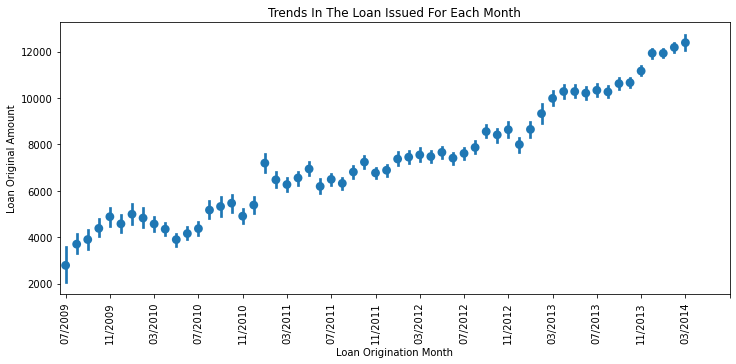

In [10]:
plt.figure(figsize=[12,5])
sns.pointplot(data=sorted_df, x='loan_Origination_month', y='LoanOriginalAmount', linestyles='')
plt.xlabel('Loan Origination Month')
plt.ylabel('Loan Original Amount')
plt.title('Trends In The Loan Issued For Each Month')
plt.xticks(np.arange(0, 62, step=4), rotation=90);

> There is an upward growth of the total amount of loan requested each month from July 2009 to March 2014.

### Trends in the Lender Yield Over The Years

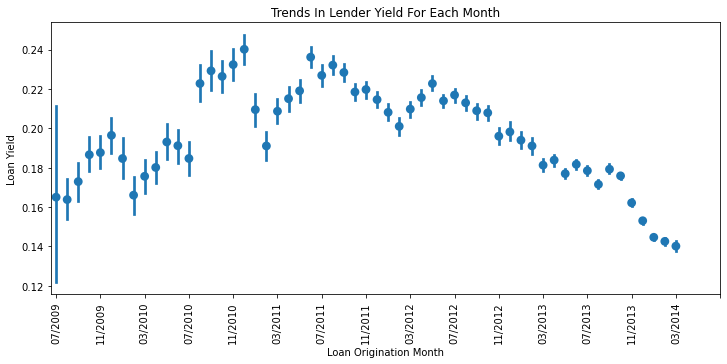

In [11]:
plt.figure(figsize=[12,5])
sns.pointplot(data=sorted_df, x='loan_Origination_month', y='LenderYield', linestyles='')
plt.xlabel('Loan Origination Month')
plt.ylabel('Loan Yield')
plt.title('Trends In Lender Yield For Each Month')
plt.xticks(np.arange(0, 62, step=4), rotation=90);

> The lender yield have varied over the years with a peak valuein December 2010. However, in recent times, the yield keeps dropping. I guess this is strategic to encourage more borrowers.

### Monthly Trend In Loan Amount For Each Income Range

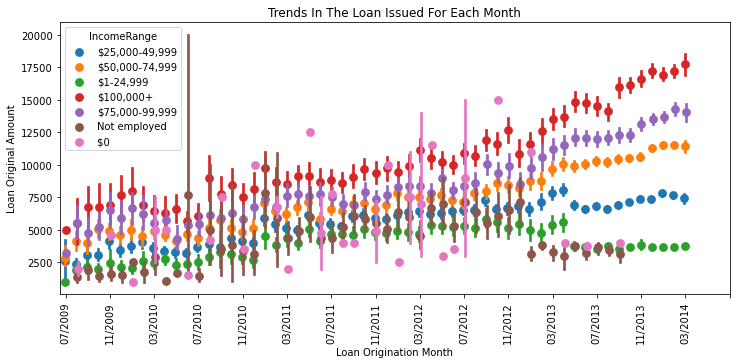

In [12]:
plt.figure(figsize=[12,5])
sns.pointplot(data=sorted_df, x='loan_Origination_month', y='LoanOriginalAmount', linestyles='', hue='IncomeRange', dodge=True)
plt.xlabel('Loan Origination Month')
plt.ylabel('Loan Original Amount')
plt.title('Trends In The Loan Issued For Each Month')
plt.xticks(np.arange(0, 62, step=4), rotation=90);

> Generally, there is an upward growth in the loan original amount from 2009 to 2014. However, for those with zero income, the loan original amount tends to fluctuate more between high and low. For income range of 100,000+ dollars, the loan original amount requested are higher than the rest.

### Factors that affects the borrower’s APR or interest rate?
To investigate this, we would visualize the relationship BorrowerAPR has with variables like LoanOriginalAmount, MonthlyLoanPayment, Investors, Term.

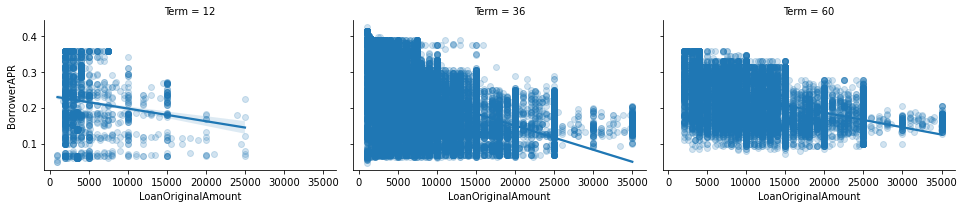

In [13]:
g = sns.FacetGrid(data=loan_df, col='Term', height = 3, aspect=1.5)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', scatter_kws={'alpha':1/5});

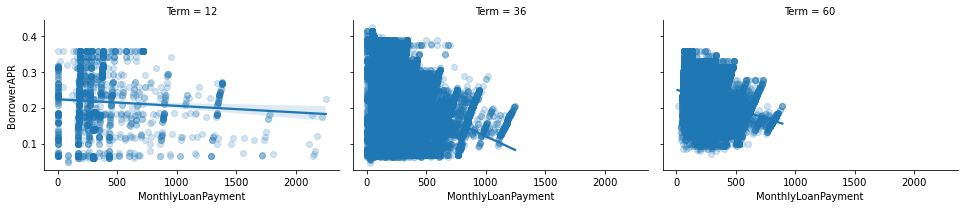

In [14]:
g = sns.FacetGrid(data=loan_df, col='Term', height = 3, aspect=1.5)
g.map(sns.regplot, 'MonthlyLoanPayment', 'BorrowerAPR', scatter_kws={'alpha':1/5});

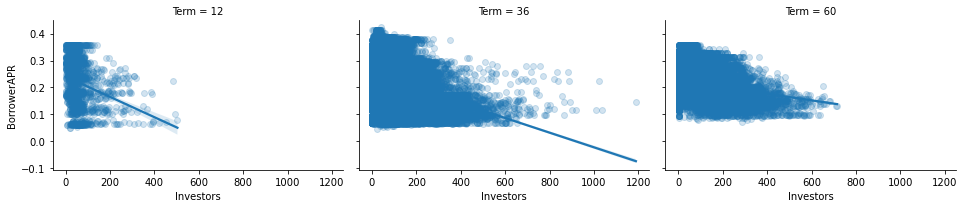

In [15]:
g = sns.FacetGrid(data=loan_df, col='Term', height = 3, aspect=1.5)
g.map(sns.regplot, 'Investors', 'BorrowerAPR', scatter_kws={'alpha':1/5 });

> From the figures above, we could see that as the loan original amount, monthly loan payment and investors increases, the BorrowerAPR reduces. However, there is a sharp reduction in interest rate for the 36months compared to the 12months and 60months loan.

### Are there differences between loans depending on how large the original loan amount was?
To investigate this, the loan original amount would be divided into three categories; small, medium and large loans.

In [16]:
# Bin edges that would be used to categories the loan original amount into groups
bin_edges = [1000, 4000, 14000, 35000]
# Labels for the categorical loan amount
bin_names = ['small', 'average', 'large']

#creating loan amount level
loan_df['loan_size'] = pd.cut(loan_df['LoanOriginalAmount'], bin_edges, labels=bin_names)

# Check for successful creation of this column
loan_df.head()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,Occupation,EmploymentStatus,IncomeRange,AmountDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,loan_Origination_month,loan_size
1,1209647,36,Current,0.12016,0.0920,0.0820,7.0,Professional,Employed,"$50,000-74,999",0.0,10000,2014-03-03,318.93,1,03/2014,average
3,658116,36,Current,0.12528,0.0974,0.0874,9.0,Skilled Labor,Employed,"$25,000-49,999",10056.0,10000,2012-11-01,321.45,158,11/2012,average
4,909464,36,Current,0.24614,0.2085,0.1985,4.0,Executive,Employed,"$100,000+",0.0,15000,2013-09-20,563.97,20,09/2013,large
5,1074836,60,Current,0.15425,0.1314,0.1214,10.0,Professional,Employed,"$100,000+",0.0,15000,2013-12-24,342.37,1,12/2013,large
6,750899,36,Current,0.31032,0.2712,0.2612,2.0,Sales - Retail,Employed,"$25,000-49,999",0.0,3000,2013-04-18,122.67,1,04/2013,small


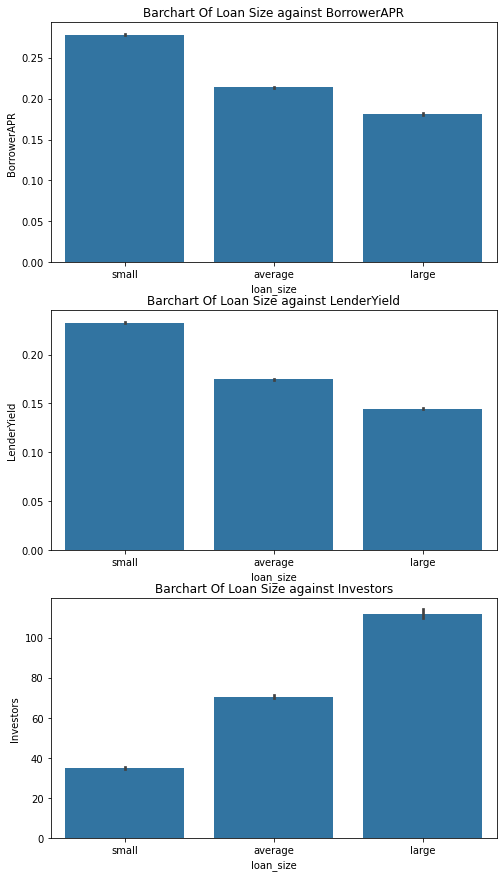

In [17]:
plt.figure(figsize=[8,15])
base_color = sns.color_palette()[0]

plt.subplot(3,1,1)
sns.barplot(x=loan_df.loan_size, y = loan_df.BorrowerAPR, color=base_color)
plt.title('Barchart Of Loan Size against BorrowerAPR')

plt.subplot(3,1,2)
sns.barplot(x=loan_df.loan_size, y = loan_df.LenderYield, color=base_color)
plt.title('Barchart Of Loan Size against LenderYield')

plt.subplot(3,1,3)
sns.barplot(x=loan_df.loan_size, y = loan_df.Investors, color=base_color)
plt.title('Barchart Of Loan Size against Investors');

> There are differences between loan depending on large the original amount is. The barcharts of BorrowerAPR above reveals, the average interest rate for small loans is larger than that of large loans. The LenderYield for small loans is larger than that of large loans. While the number of investors need for small loans is smaller than that of large loan.